### Calculate parquet layout

10 pack, 1.8 $m^2$ per pack, 4 piece per pack -> 40 piece

In [1]:
import matplotlib.pyplot as plt
from pylab import rcParams
rcParams['figure.figsize'] = 15, 8

In [2]:
# Input:
firstCut = 30 # cut from first piece
minWidth = 30 # minimum size of piece, if smaller, throw out

In [3]:
# Room dimensions
x = 389
y = 376
x1 =66
y1 = 118
y2 = 89.5
y3 = 168.5

In [4]:
# Parquet dimensions
pHeight = 24.5
pWidth = 184.5
parquetArea = pHeight*pWidth
packArea = 1.8*10000
numInPack = packArea/parquetArea
print(numInPack)

3.982080637132902


In [5]:
area = x*y+x1*y2
print(area)

152171.0


In [6]:
def createParquet(x0, y0, w=pWidth):
    parquet= [[x0, y0], [x0+w, y0], [x0+w, y0-pHeight], [x0, y0-pHeight], [x0, y0]]
    parquetCoords = [[p[0] for p in parquet], [p[1] for p in parquet]]
    return parquetCoords

In [7]:
def layoutParquets():
    global pWidth, pHeight, firstCut
    piecesUsed = 1
    parquets = []
    startLen = 0
    currY = y
    remain = pWidth - firstCut
    #parquets = [createParquet(0, y, pWidth), createParquet(pWidth, y)]
    while currY > 0:
        xx = 0
        parquets.append(createParquet(xx, currY, remain))
        xx += remain
        parquets.append(createParquet(xx, currY, pWidth))
        piecesUsed += 1
        xx += pWidth
        w = x
        if currY < y - y3:
            w = x+x1
        if currY < y - y3 - y2:
            w = x
        lastPiece = w - remain - pWidth
        if lastPiece > pWidth:
            parquets.append(createParquet(xx, currY, pWidth))
            piecesUsed += 1
            xx += pWidth
            lastPiece -= pWidth
        #print(f'curry {currY}, remain: {remain}, lastPiece {lastPiece}')
        parquets.append(createParquet(xx, currY, lastPiece))
        piecesUsed += 1
        remain = pWidth - lastPiece
        if remain < minWidth:
            remain = 0 # throw away remaining as too small
            piecesUsed += 1
        currY -= pHeight
    print(f'pieces used: {piecesUsed}, packs used={piecesUsed/4.0}')
    return parquets

In [8]:
#parquets = [createParquet(0, y), createParquet(pWidth, y)]
parquets = layoutParquets()

pieces used: 39, packs used=9.75


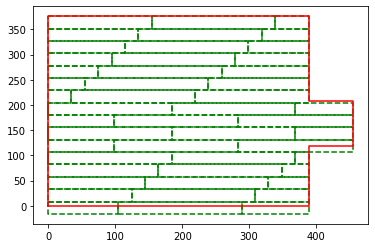

In [9]:
for p in parquets:
    plt.plot(p[0],p[1], 'g--')
plt.plot([0, x, x, x+x1, x+x1, x, x, 0, 0], [0, 0, y1, y1, y1+y2, y1+y2, y1+y2+y3,y1+y2+y3, 0], 'r')
plt.show()